In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

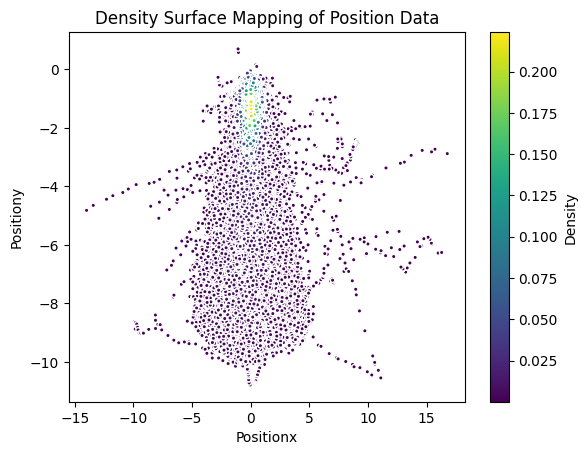

In [2]:
# Read the Excel file
file_path = '/Users/yangfanzhou/Desktop/1.8/Cluster_Data_Wholedistance_withposition(cleaned).xlsx'
data = pd.read_excel(file_path)

# Clean the data: remove rows containing missing values
cleaned_data = data.dropna(subset=['Positionx', 'Positiony'])

# Extract Positionx and Positiony data
x = cleaned_data['Positionx']
y = cleaned_data['Positiony']

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Create the plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=10, edgecolor='white')
plt.colorbar(scatter, label='Density')
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.title('Density Surface Mapping of Position Data')
plt.show()


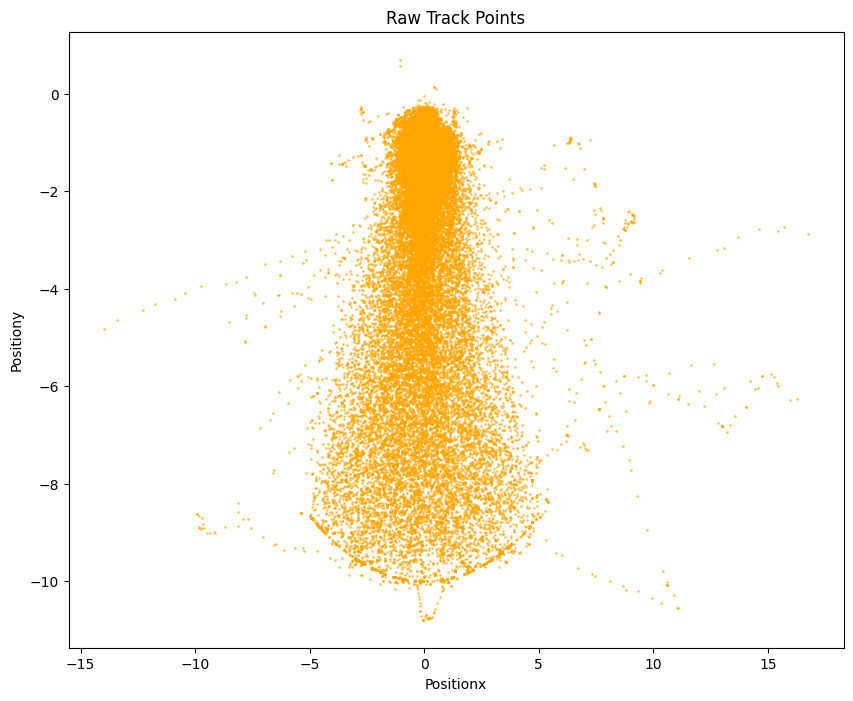

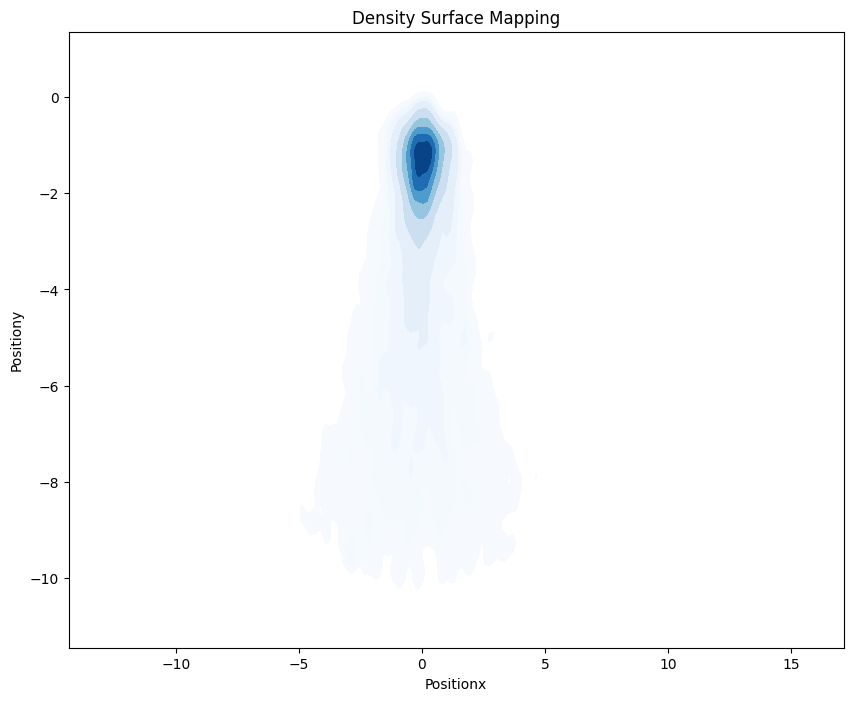

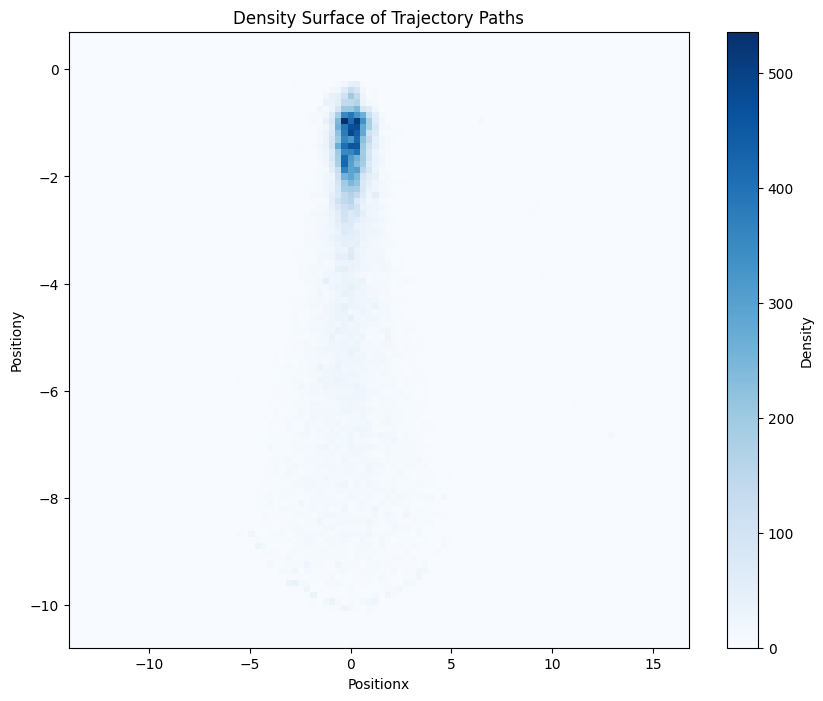

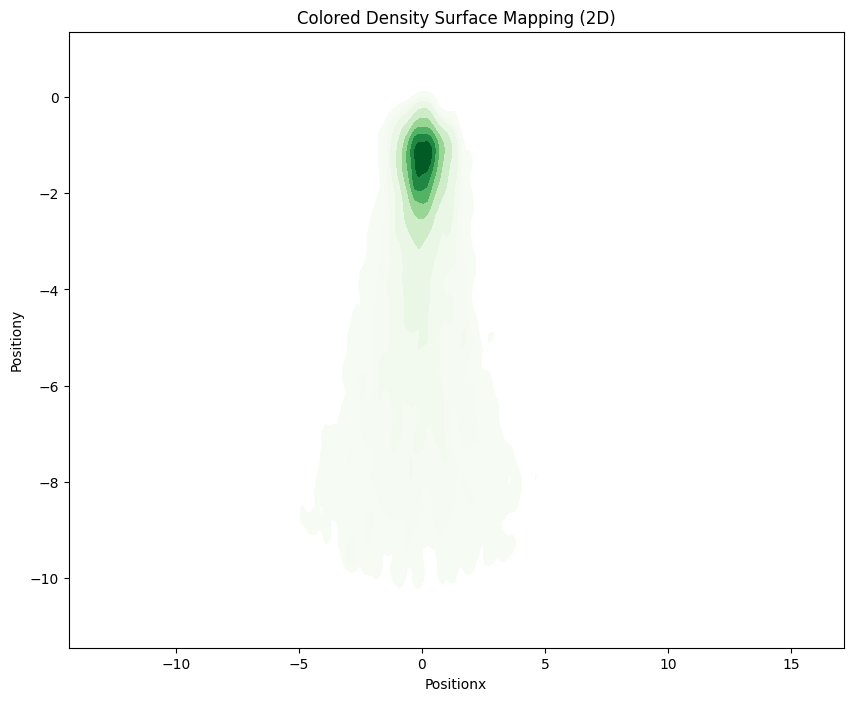

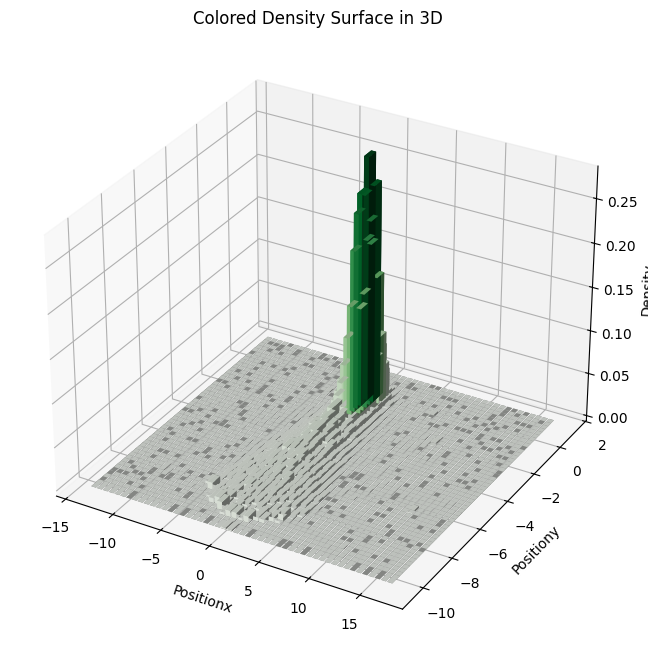

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
file_path = '/Users/yangfanzhou/Desktop/1.8/Cluster_Data_Wholedistance_withposition(cleaned).xlsx'
data = pd.read_excel(file_path)

# Clean the data: remove rows containing missing values
cleaned_data = data.dropna(subset=['Positionx', 'Positiony'])

# Extract Positionx and Positiony data
x = cleaned_data['Positionx']
y = cleaned_data['Positiony']

# Plot raw track points
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='orange', s=1, alpha=0.5)
plt.title('Raw Track Points')
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.show()

# Plot density surface map
plt.figure(figsize=(10, 8))
sns.kdeplot(x=x, y=y, cmap='Blues', fill=True, bw_adjust=0.5)
plt.title('Density Surface Mapping')
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.show()

# Plot trajectory path density
plt.figure(figsize=(10, 8))
plt.hist2d(x, y, bins=100, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Density Surface of Trajectory Paths')
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.show()

# Colored density surface map (2D and 3D)
plt.figure(figsize=(10, 8))
sns.kdeplot(x=x, y=y, cmap='Greens', fill=True, bw_adjust=0.5)
plt.title('Colored Density Surface Mapping (2D)')
plt.xlabel('Positionx')
plt.ylabel('Positiony')
plt.show()

# 3D density map
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=50, density=True)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=plt.cm.Greens(dz / dz.max()))

ax.set_xlabel('Positionx')
ax.set_ylabel('Positiony')
ax.set_zlabel('Density')
ax.set_title('Colored Density Surface in 3D')
plt.show()
